
# Árbol de Decisión con dataset simple "Play Tennis"

Este cuaderno usa un dataset clásico de ejemplo para mostrar cómo funciona un árbol de decisión de forma clara e interpretativa.

Pasos:
1. Crear el dataset "Play Tennis"
2. Entrenar un `DecisionTreeClassifier` (criterio Gini y Entropía)
3. Visualizar el árbol
4. Interpretar reglas de decisión


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset Play Tennis
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                   'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                   'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                   'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
                   'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
# Convertir variables categóricas a numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
y = df['PlayTennis']

df_encoded


,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


In [ ]:
# Entrenar árbol con criterio Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(df_encoded, y)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Entrenar árbol con criterio Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(df_encoded, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

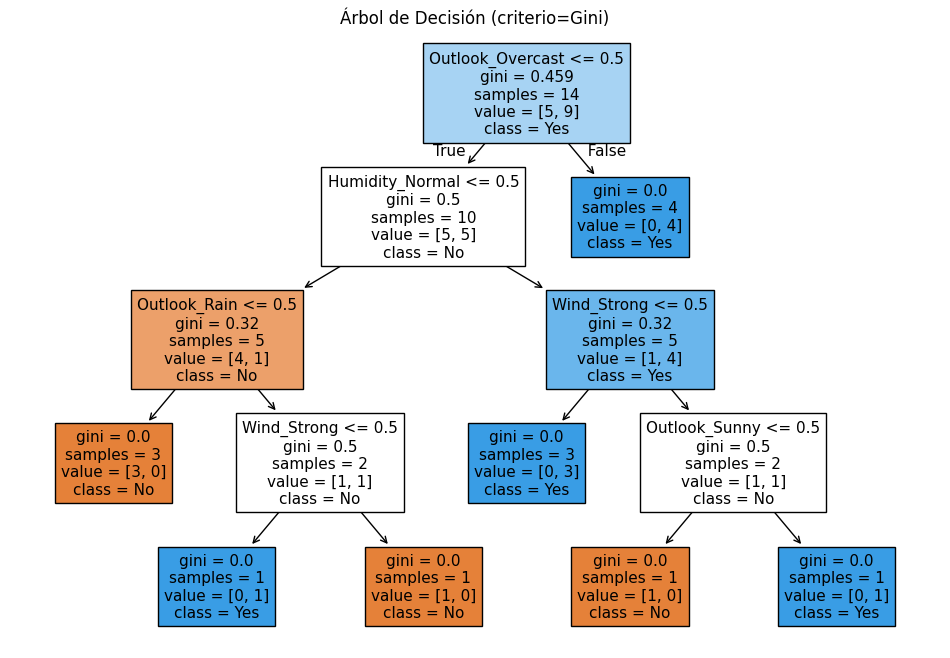

In [ ]:
# Visualizar árbol (Gini)
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, feature_names=df_encoded.columns, class_names=clf_gini.classes_, filled=True)
plt.title("Árbol de Decisión (criterio=Gini)")
plt.show()


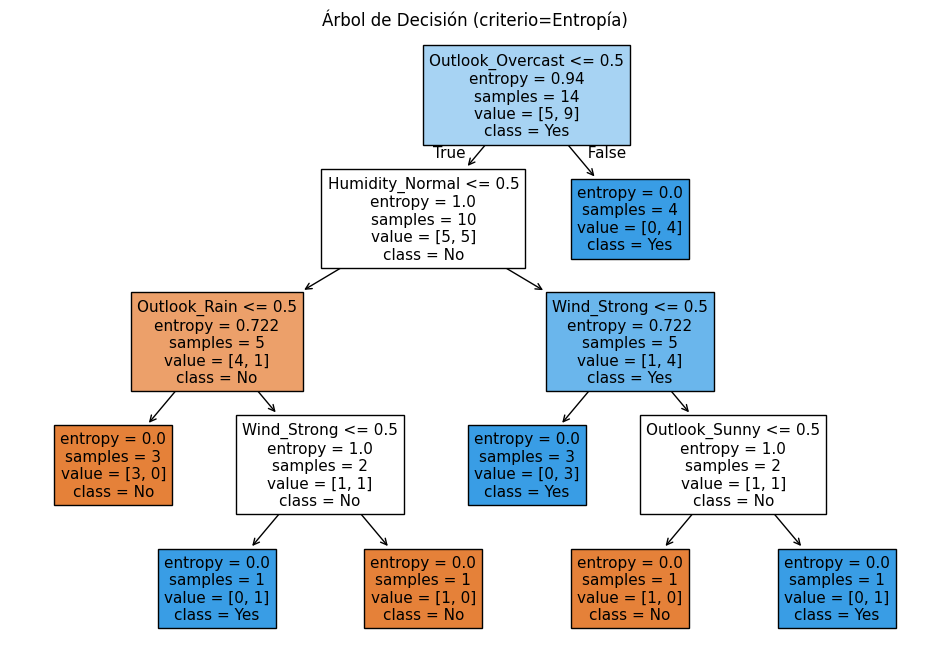

In [ ]:
# Visualizar árbol (Entropía)
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=df_encoded.columns, class_names=clf_entropy.classes_, filled=True)
plt.title("Árbol de Decisión (criterio=Entropía)")
plt.show()


In [ ]:
# Ejemplo de predicción
ejemplo = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Strong']
})
ejemplo_encoded = pd.get_dummies(ejemplo).reindex(columns=df_encoded.columns, fill_value=0)

print("Ejemplo:", ejemplo.to_dict(orient='records'))
print("Predicción (Gini):", clf_gini.predict(ejemplo_encoded)[0])
print("Predicción (Entropía):", clf_entropy.predict(ejemplo_encoded)[0])


Ejemplo: [{'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}]
Predicción (Gini): No
Predicción (Entropía): No
